<a href="https://colab.research.google.com/github/learner197/Research-Project/blob/RP-CAE/CAE_2_14_nght_ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import os

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from PIL import Image as im
#import cv2
import plotly.express as px

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
tf.config.run_functions_eagerly(True)


In [4]:
import cv2

In [5]:
image_dir_1 = Path('/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz')
image_dir_2 = Path('/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/spectogram_Xethru')
image_dir_3 = Path('/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/Spectrograms_24GHz')


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TEMPLATE to take images as input

In [ ]:
'''
# TEMPLATE to take images as input

# Set the path to your image folder
folder_path = '/path/to/your/folder'

# Initialize empty lists to store the images and labels
images = []
labels = []

# Loop through all the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Read the image using OpenCV and convert to grayscale
        img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
        # Resize the image to a fixed size
        img = cv2.resize(img, (28, 28))
        # Convert the image to a numpy array
        img = np.array(img)
        # Add the image and label to the lists
        images.append(img)
        labels.append(0) # Replace with your own label
        
# Convert the image and label lists to numpy arrays
images = np.array(images)
labels = np.array(labels)
'''

# Taking images as input

In [7]:
m={
    "05_Walking_towards_radar":1,
   "06_walking_away_from_Radar":2,
   "07_picking_up_an_object":3,
   "08_bending":4,
   "09_sitting":5,
   "10_kneeling":6,
    "11_crawling":7,
   "16_Walking_on_both_toes":8,
   "17_limping_with_right_leg_stiff":9,
   "18_short_steps":10,
   
   "19_scissors_gait":11
}

In [11]:
#images_1.shape,np.max(images_1)

In [8]:
images_1=[]
labels_1=[]

for file in os.listdir(image_dir_1):
    file_dir = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz/{}".format(file)
    for file_name in os.listdir(file_dir):
        #path = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz/{}/{}".format(file,file_name)
        # Read the image using OpenCV and convert to grayscale
        img = cv2.imread(os.path.join(file_dir, file_name), cv2.IMREAD_GRAYSCALE)
        #print(img)
        try:
          # Resize the image to a fixed size
          img = cv2.resize(img, (64, 64))
          #print(img.shape)
        except:
          break
        # Convert the image to a numpy array
        img = np.array(img)
        # Add the image and label to the lists
        images_1.append(img)
        labels_1.append(m[file])
labels_1=np.array(labels_1)
labels_1=np.float32(labels_1)
images_1=np.array(images_1)
images_1=np.float32(images_1)

In [9]:
labels_1[0]

8.0

In [10]:
images_2=[]
labels_2=[]

for file in os.listdir(image_dir_1):
    file_dir = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/spectogram_Xethru/{}".format(file)
    for file_name in os.listdir(file_dir):
        #path = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz/{}/{}".format(file,file_name)
        # Read the image using OpenCV and convert to grayscale
        img = cv2.imread(os.path.join(file_dir, file_name), cv2.IMREAD_GRAYSCALE)
        #print(img)
        try:
          # Resize the image to a fixed size
          img = cv2.resize(img, (64, 64))
          #print(img.shape)
        except:
          break
        # Convert the image to a numpy array
        img = np.array(img)
        # Add the image and label to the lists
        images_2.append(img)
        labels_2.append(m[file])
labels_2=np.array(labels_2)
labels_2=np.float32(labels_2)
images_2=np.array(images_2)
images_2=np.float32(images_2)

In [11]:
images_3=[]
labels_3=[]

for file in os.listdir(image_dir_1):
    file_dir = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/Spectrograms_24GHz/{}".format(file)
    for file_name in os.listdir(file_dir):
        #path = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz/{}/{}".format(file,file_name)
        # Read the image using OpenCV and convert to grayscale
        img = cv2.imread(os.path.join(file_dir, file_name), cv2.IMREAD_GRAYSCALE)
        #print(img)
        try:
          # Resize the image to a fixed size
          img = cv2.resize(img, (64, 64))
          #print(img.shape)
        except:
          break
        # Convert the image to a numpy array
        img = np.array(img)
        # Add the image and label to the lists
        images_3.append(img)
        labels_3.append(m[file])
labels_3=np.array(labels_3)
labels_3=np.float32(labels_3)
images_3=np.array(images_3)
images_3=np.float32(images_3)

In [12]:
images_1=images_1/np.max(images_1)
images_2=images_2/np.max(images_2)
images_3=images_3/np.max(images_3)
np.max(images_1),np.max(images_2),np.max(images_3)

(1.0, 1.0, 1.0)

# Reason why model3 is not working

In [18]:
set(labels_3),set(labels_1),set(labels_2)

({1.0},
 {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0},
 {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0})

# Frequency of each class

In [13]:
classes=[]
classes.append('NA')
l=list(m.keys())
classes=classes+l
classes

['NA',
 '05_Walking_towards_radar',
 '06_walking_away_from_Radar',
 '07_picking_up_an_object',
 '08_bending',
 '09_sitting',
 '10_kneeling',
 '11_crawling',
 '16_Walking_on_both_toes',
 '17_limping_with_right_leg_stiff',
 '18_short_steps',
 '19_scissors_gait']

In [14]:
type(classes[0])

str

In [15]:
classes_values = pd.DataFrame(classes,columns=['class_name'])
print("Class names and their serial no's")
classes_values

Class names and their serial no's


,class_name
0,NA
1,05_Walking_towards_radar
2,06_walking_away_from_Radar
3,07_picking_up_an_object
4,08_bending
5,09_sitting
6,10_kneeling
7,11_crawling
8,16_Walking_on_both_toes
9,17_limping_with_right_leg_stiff


Text(0.5, 1.0, 'Frequency of each class in 77GHZ-data')

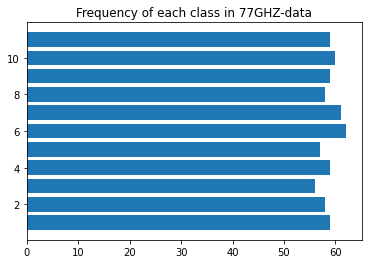

In [16]:
d=dict()
for i in set(labels_1):
    d[i]=0
for i in labels_1:
    d[i]=d[i]+1
d
y_graph=[]
x_graph=[]
j=0
for i in set(labels_1):
    x_graph.append(i)
    y_graph.append(d[i])
plt.barh(x_graph,y_graph)
plt.title("Frequency of each class in 77GHZ-data")

Text(0.5, 1.0, 'Frequency of each class in Xethru-data')

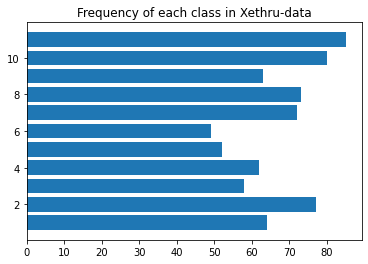

In [17]:
d=dict()
for i in set(labels_2):
    d[i]=0
for i in labels_2:
    d[i]=d[i]+1
d
y_graph=[]
x_graph=[]
j=0
for i in set(labels_2):
    x_graph.append(i)
    y_graph.append(d[i])
plt.barh(x_graph,y_graph)
plt.title("Frequency of each class in Xethru-data")

Text(0.5, 1.0, 'Frequency of each class in Xethru-data')

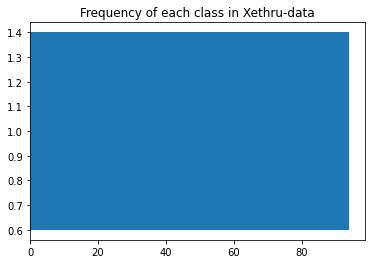

In [18]:
d=dict()
for i in set(labels_3):
    d[i]=0
for i in labels_3:
    d[i]=d[i]+1
d
y_graph=[]
x_graph=[]
j=0
for i in set(labels_3):
    x_graph.append(i)
    y_graph.append(d[i])
plt.barh(x_graph,y_graph)
plt.title("Frequency of each class in Xethru-data")

# Padding version-1

In [ ]:
''''max_size = np.max([image.shape for image in images_1], axis=0)

# Resize and pad each image to the maximum size
resized_images_1 = tf.image.resize_with_pad(images_1, max_size[0], max_size[1], method='bilinear')''''

In [ ]:
'''resized_images_1.shape,images_1.shape
type(resized_images_1)'''

# Padding version-2

In [ ]:
'''import numpy as np

# Assuming dataset is a numpy array of shape (648, 64, 64)
#dataset = np.random.rand(648, 64, 64)

# Desired output shape after padding
output_shape = (648, 64, 64)

# Calculate the pad amounts for each dimension
pad_amounts = [(output_shape[i] - images_1.shape[i]) // 2 for i in range(3)]

# Apply the padding using the desired padding strategy (e.g. reflect)
padded_dataset_1 = np.pad(images_1, [(0, 0), (pad_amounts[1], pad_amounts[1]), (pad_amounts[2], pad_amounts[2])], mode='reflect')
padded_dataset_2 = np.pad(images_2, [(0, 0), (pad_amounts[1], pad_amounts[1]), (pad_amounts[2], pad_amounts[2])], mode='reflect')
padded_dataset_3 = np.pad(images_3, [(0, 0), (pad_amounts[1], pad_amounts[1]), (pad_amounts[2], pad_amounts[2])], mode='reflect')


# Verify that the number of images remain the same
print(padded_dataset_1.shape[0])  # Output: 648
'''

In [ ]:
#padded_dataset_1.shape, images_1.shape

In [ ]:
'''images_1=padded_dataset_1
images_2=padded_dataset_2
images_3=padded_dataset_3'''

# Convert data from int datatype to float datatype

In [ ]:
'''resized_images_1=np.float32(resized_images_1)
type(resized_images_1[0][0][0]),type(images_1[0][0][0])'''

In [ ]:
#resized_images_1.shape

In [ ]:
#images_1=np.float32(images_1)

In [ ]:
#labels_1[0]

In [ ]:
#len(labels_1)

In [ ]:
#images_1.shape# total 648 images

In [ ]:
#len(images_1[0])# 28 rows* 28 columns

In [ ]:
#images_1[0][0]# 1st row of 1st image

In [ ]:
#images_1[0]

#Rough

In [ ]:
type(images_1),type(labels_1)

(numpy.ndarray, numpy.ndarray)

In [ ]:
images_1.shape,images_2.shape,images_3.shape

((648, 64, 64), (735, 64, 64), (94, 64, 64))

In [ ]:
images_1# set of all datapoints

array([[[14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        ...,
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.]],

       [[14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        ...,
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.]],

       [[14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        ...,
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.]],

       ...,

       [[14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.

In [ ]:
images_1[647]# 647th datapoint is of size 64*64

array([[14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       ...,
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.]], dtype=float32)

In [ ]:
images_1[0][0] # 1 row of 0th datapoint

array([14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.],
      dtype=float32)

In [ ]:
len(images_1[0])

64

In [ ]:
len(images_1[0][0])

64

In [ ]:
images_1[0]

array([[14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       ...,
       [14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14]], dtype=uint8)

In [ ]:
labels_1

[]

# Plots

'# Display the first image in testing data\nplt.subplot(122)\ncurr_img = np.reshape(test_data[10], (28,28))\ncurr_lbl = test_labels[10]\nplt.imshow(curr_img, cmap=\'gray\')\nplt.title("(Label: " + str(label_dict[curr_lbl]) + ")")'

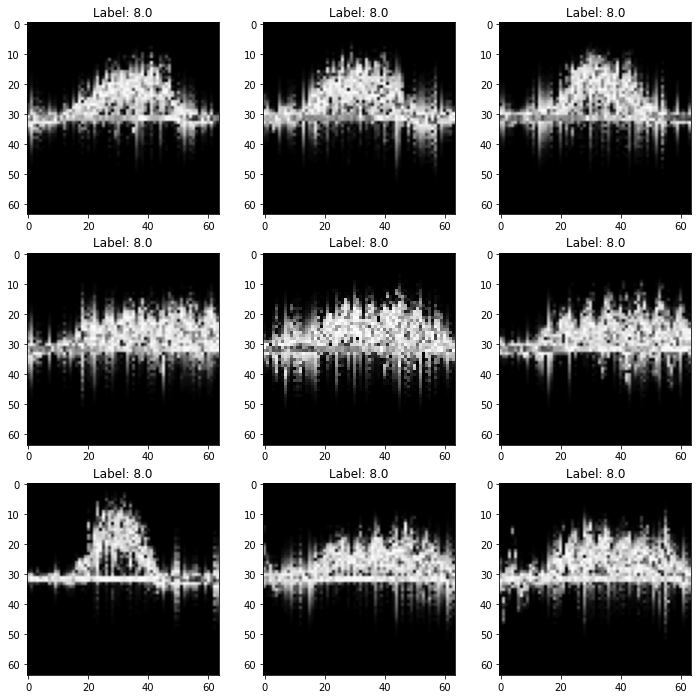

In [19]:
plt.figure(figsize=[12,12])

# Display the first image in training data

for i in range(1,10):
  plt.subplot(3,3,i)
  curr_img = np.reshape(images_1[i], (64,64))
  curr_lbl = labels_1[i]
  plt.imshow(curr_img, cmap='gray')
  plt.title("Label: " + str(curr_lbl))

'''# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_data[10], (28,28))
curr_lbl = test_labels[10]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")'''


'# Display the first image in testing data\nplt.subplot(122)\ncurr_img = np.reshape(test_data[10], (28,28))\ncurr_lbl = test_labels[10]\nplt.imshow(curr_img, cmap=\'gray\')\nplt.title("(Label: " + str(label_dict[curr_lbl]) + ")")'

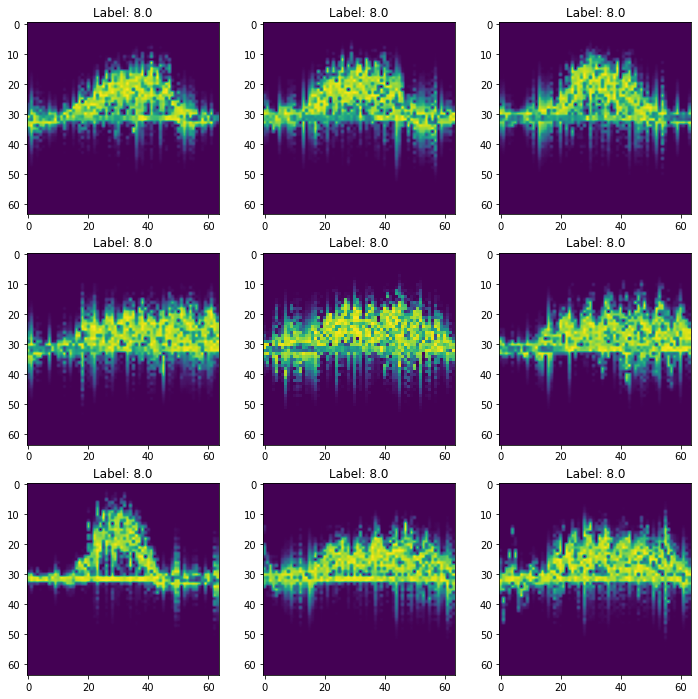

In [20]:
plt.figure(figsize=[12,12])

# Display the first image in training data

for i in range(1,10):
  plt.subplot(3,3,i)
  curr_img = np.reshape(images_1[i], (64,64))
  curr_lbl = labels_1[i]
  plt.imshow(curr_img)
  plt.title("Label: " + str(curr_lbl))

'''# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_data[10], (28,28))
curr_lbl = test_labels[10]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")'''


In [ ]:
type(images_1[0][0][0])

numpy.float32

In [ ]:
np.max(images_1)

1.0

In [ ]:
images_1=images_1/np.max(images_1)

In [ ]:
np.max(images_1)

1.0

# Training the model

In [124]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(images_1, labels_1, test_size=0.2, random_state=42)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(images_2, labels_2, test_size=0.2, random_state=42)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(images_3, labels_3, test_size=0.2, random_state=42)

In [125]:
x_train_1, x_val_1, y_train_1, y_val_1 = train_test_split(x_train_1, y_train_1, test_size=0.2, random_state=42)
x_train_2, x_val_2, y_train_2, y_val_2 = train_test_split(x_train_2, y_train_2, test_size=0.2, random_state=42)
x_train_3, x_val_3, y_train_3, y_val_3 = train_test_split(x_train_3, y_train_3, test_size=0.2, random_state=42)

In [ ]:
'''x_train_1=x_train_1.reshape(-1,64,64,1)
x_train_2=x_train_2.reshape(-1,64,64,1)
x_train_3=x_train_3.reshape(-1,64,64,1)
x_val_1=x_val_1.reshape(-1,64,64,1)
x_val_2=x_val_2.reshape(-1,64,64,1)
x_val_3=x_val_3.reshape(-1,64,64,1)
x_test_1=x_test_1.reshape(-1,64,64,1)
x_test_2=x_test_2.reshape(-1,64,64,1)
x_test_3=x_test_3.reshape(-1,64,64,1)'''

In [16]:
x_train_1[0]

array([[0.06222222, 0.06222222, 0.06222222, ..., 0.06222222, 0.06222222,
        0.06222222],
       [0.06222222, 0.06222222, 0.06222222, ..., 0.06222222, 0.06222222,
        0.06222222],
       [0.06222222, 0.06222222, 0.06222222, ..., 0.06222222, 0.06222222,
        0.06222222],
       ...,
       [0.06222222, 0.06222222, 0.06222222, ..., 0.06222222, 0.06222222,
        0.06222222],
       [0.06222222, 0.06222222, 0.06222222, ..., 0.06222222, 0.06222222,
        0.06222222],
       [0.06222222, 0.06222222, 0.06222222, ..., 0.06222222, 0.06222222,
        0.06222222]], dtype=float32)

In [ ]:
y_train_1[0]

6.0

# Converting output variable into an array

In [ ]:
y_train_1=np.array(y_train_1)
y_train_2=np.array(y_train_2)
y_train_3=np.array(y_train_3)

y_val_1=np.array(y_val_1)
y_val_2=np.array(y_val_2)
y_val_3=np.array(y_val_3)

y_test_1=np.array(y_test_1)
y_test_2=np.array(y_test_2)
y_test_3=np.array(y_test_3)

# Shapes of training, testing, validation data

In [ ]:
print(x_train_1.shape)
print(x_val_1.shape)
print(x_test_1.shape)
print(x_train_1.shape[0]+x_val_1.shape[0]+x_test_1.shape[0])
type(x_train_1)

(414, 64, 64, 1)
(104, 64, 64, 1)
(130, 64, 64, 1)
648


numpy.ndarray

In [ ]:
print(y_train_1.shape)
print(y_val_1.shape)
print(y_test_1.shape)
print(y_train_1.shape[0]+y_val_1.shape[0]+y_test_1.shape[0])
type(y_train_1)

(414,)
(104,)
(130,)
648


numpy.ndarray

In [ ]:
type(y_train_1[0])

numpy.float32

In [23]:
col_names=['77GHZ','Xethru','24GHZ']
#col_vals=[],[train_df_2.shape[0],test_df_2.shape[0]],[train_df_3.shape[0],test_df_3.shape[0]]]
d={'77GHZ':[x_train_1.shape[0],x_val_1.shape[0],x_test_1.shape[0]],
   'Xethru':[x_train_2.shape[0],x_val_2.shape[0],x_test_2.shape[0]],
   '24GHZ':[x_train_3.shape[0],x_val_3.shape[0],x_test_3.shape[0]]
}
images_summary = pd.DataFrame(d)
images_summary.index=['training_images','validation_images','testing_images']
images_summary

,77GHZ,Xethru,24GHZ
training_images,414,470,60
validation_images,104,118,15
testing_images,130,147,19


In [ ]:
from tensorflow.keras.layers import Flatten

# CAE-1

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import keras

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Define the input layer
input_img = Input(shape=(64, 64, 1))

# Encoder
x = Conv2D(32, (9, 9), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2),strides=(2,2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2),strides=(2,2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (9, 9), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='softmax', padding='same')(x)

# Define the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy')
#autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
autoencoder.summary()

<IPython.core.display.Javascript object>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928 

# CAE-2 DATACAMP

In [33]:
col_names=['77GHZ','Xethru','24GHZ']
#col_vals=[],[train_df_2.shape[0],test_df_2.shape[0]],[train_df_3.shape[0],test_df_3.shape[0]]]
d={'77GHZ':[x_train_1.shape[0],x_val_1.shape[0],x_test_1.shape[0]],
   'Xethru':[x_train_2.shape[0],x_val_2.shape[0],x_test_2.shape[0]],
   '24GHZ':[x_train_3.shape[0],x_val_3.shape[0],x_test_3.shape[0]]
}
images_summary = pd.DataFrame(d)
images_summary.index=['training_images','validation_images','testing_images']
images_summary

,77GHZ,Xethru,24GHZ
training_images,414,470,60
validation_images,104,118,15
testing_images,130,147,19


In [24]:
from tensorflow.keras.layers import Flatten

In [25]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import keras

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Define the input layer
input_img = Input(shape=(64, 64, 1))

# Encoder
def encoder(input_img):
  x = Conv2D(32, (9, 9), activation='relu', padding='same')(input_img)
  x = MaxPooling2D((2, 2),strides=(2,2), padding='same')(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  encoded = MaxPooling2D((2, 2),strides=(2,2), padding='same')(x)
  encoded=Flatten()(encoded)
  encoded=Dense(512)(encoded)
  return encoded

# Decoder
def decoder(encoded): 
  x=layers.Dense(64*64,activation='relu')(encoded)
  x=tf.keras.layers.Reshape((64,64,1))(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(32, (9, 9), activation='relu', padding='same')(x)
  #x = UpSampling2D((2, 2))(x)
  decoded = Conv2D(1, (3, 3),strides=(2,2), activation='softmax', padding='same')(x)
  return decoded

# Define the model
autoencoder1 = Model(input_img, decoder(encoder(input_img)))
autoencoder1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy')
#autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
autoencoder1.summary()

<IPython.core.display.Javascript object>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0     

In [26]:
# Define the model
autoencoder2 = Model(input_img, decoder(encoder(input_img)))
autoencoder2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy')
#autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
autoencoder2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0   

In [27]:
# Define the model
autoencoder3 = Model(input_img, decoder(encoder(input_img)))
autoencoder3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy')
#autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
autoencoder3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0   

In [18]:
images_1.shape

(648, 64, 64)

# After CAE

In [ ]:
print(len(x_test_1))
print(len(y_test_1))
print(type(x_test_1))
print(type(y_test_1))
print(y_test_1[0])
print(type(y_test_1[0]))

130
130
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
3.0
<class 'numpy.float32'>


# CAE Training

In [21]:
x_train_1.shape,y_train_1.shape

((414, 64, 64), (414,))

In [23]:
x_train_1.shape,x_val_1.shape,x_test_1.shape

((414, 64, 64), (104, 64, 64), (130, 64, 64))

In [ ]:
y_train_1=y_train_1.reshape(y_train_1.shape[0],1)

In [ ]:
y_train_1.shape

(414, 1)

In [28]:
autoencoder1.fit(x_train_1,x_train_1,
          epochs=1, 
          batch_size=16,
          validation_data=(x_val_1,x_val_1))

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


26/26 [==============================] - 14s 144ms/step - loss: 50.4085 - val_loss: 50.5288


In [29]:
autoencoder2.fit(x_train_2,x_train_2,
          epochs=1, 
          batch_size=16,
          validation_data=(x_val_2,x_val_2))

30/30 [==============================] - 3s 92ms/step - loss: 29.6875 - val_loss: 30.1350


In [30]:
autoencoder3.fit(x_train_3,x_train_3,
          epochs=1, 
          batch_size=16,
          validation_data=(x_val_3,x_val_3))

4/4 [==============================] - 2s 702ms/step - loss: 59.2659 - val_loss: 61.1802


In [ ]:
'''autoencoder.fit(x_train_1,y_train_1,
          epochs=10, 
          validation_data=(x_val_1,y_val_1))'''

In [31]:
autoencoder_train_his1=autoencoder1.history.history
autoencoder_train_his1

{'loss': [50.40850830078125], 'val_loss': [50.52881622314453]}

In [32]:
autoencoder_train_his2=autoencoder2.history.history
autoencoder_train_his2

{'loss': [29.68754768371582], 'val_loss': [30.13496208190918]}

In [33]:
autoencoder_train_his3=autoencoder3.history.history
autoencoder_train_his3

{'loss': [59.26594543457031], 'val_loss': [61.18016815185547]}

In [34]:
'''loss = autoencoder1.history.history['loss']
val_loss = autoencoder1.history.history['val_loss']
epochs = range(1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
'''

"loss = autoencoder1.history.history['loss']\nval_loss = autoencoder1.history.history['val_loss']\nepochs = range(1)\nplt.figure()\nplt.plot(epochs, loss, 'bo', label='Training loss')\nplt.plot(epochs, val_loss, 'b', label='Validation loss')\nplt.title('Training and validation loss')\nplt.legend()\nplt.show()\n"

In [35]:
'''loss = autoencoder2.history.history['loss']
val_loss = autoencoder2.history.history['val_loss']
epochs = range(1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
'''

"loss = autoencoder2.history.history['loss']\nval_loss = autoencoder2.history.history['val_loss']\nepochs = range(1)\nplt.figure()\nplt.plot(epochs, loss, 'bo', label='Training loss')\nplt.plot(epochs, val_loss, 'b', label='Validation loss')\nplt.title('Training and validation loss')\nplt.legend()\nplt.show()\n"

In [36]:
'''loss = autoencoder3.history.history['loss']
val_loss = autoencoder3.history.history['val_loss']
epochs = range(1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
'''

"loss = autoencoder3.history.history['loss']\nval_loss = autoencoder3.history.history['val_loss']\nepochs = range(1)\nplt.figure()\nplt.plot(epochs, loss, 'bo', label='Training loss')\nplt.plot(epochs, val_loss, 'b', label='Validation loss')\nplt.title('Training and validation loss')\nplt.legend()\nplt.show()\n"

In [37]:
autoencoder1.save_weights('autoencoder1.h5')
autoencoder2.save_weights('autoencoder2.h5')
autoencoder3.save_weights('autoencoder3.h5')


In [38]:
autoencoder1.get_weights()

[array([[[[ 0.02514206,  0.02324929,  0.00600317, ...,  0.0197446 ,
            0.02124849, -0.01008204]],
 
         [[-0.04025231,  0.00751908,  0.03160527, ..., -0.00727765,
           -0.04604679,  0.01514571]],
 
         [[ 0.00153526,  0.00538564, -0.00791935, ..., -0.02866776,
            0.04311875, -0.01308849]],
 
         ...,
 
         [[-0.03570868, -0.03188093, -0.04146593, ...,  0.04598901,
           -0.00357126, -0.01922198]],
 
         [[-0.03162105, -0.01763599,  0.04567039, ..., -0.03827745,
           -0.02565695,  0.00910698]],
 
         [[ 0.03880549,  0.0428981 ,  0.03450499, ...,  0.00806987,
            0.01306961, -0.04464777]]],
 
 
        [[[ 0.02897328,  0.02103907,  0.0303082 , ..., -0.04231316,
           -0.01738738, -0.03336202]],
 
         [[-0.01441151,  0.00728467,  0.0399802 , ..., -0.01769167,
            0.03469016, -0.01247765]],
 
         [[ 0.00229641,  0.02924663, -0.0299771 , ..., -0.02443104,
           -0.02642949,  0.03422847]],
 


In [39]:
autoencoder2.get_weights()

[array([[[[-0.00719962,  0.04631224, -0.00577439, ...,  0.04380518,
           -0.00455017,  0.01523602]],
 
         [[ 0.03352861,  0.00575243, -0.02283655, ..., -0.04453631,
           -0.02022181, -0.01689166]],
 
         [[-0.03585807,  0.02769015, -0.02992845, ..., -0.0140727 ,
            0.03413799,  0.03791641]],
 
         ...,
 
         [[-0.02487729, -0.02338656, -0.0198205 , ...,  0.01173927,
           -0.02184006, -0.04094426]],
 
         [[ 0.00243964,  0.04132903, -0.03119152, ..., -0.02603566,
            0.03398172,  0.02888761]],
 
         [[-0.02011365,  0.01208982,  0.00867721, ..., -0.01083464,
            0.03191081, -0.0473662 ]]],
 
 
        [[[-0.00405319,  0.01628102, -0.01252735, ...,  0.02863897,
            0.02487272, -0.00500618]],
 
         [[ 0.02478731,  0.03710844,  0.01610328, ...,  0.02225417,
            0.00606333,  0.03958133]],
 
         [[-0.01306329,  0.0307001 ,  0.03154387, ...,  0.01919042,
           -0.03742072, -0.00653622]],
 


In [40]:
autoencoder3.get_weights()

[array([[[[ 0.04395922,  0.02282124,  0.01371813, ..., -0.01012942,
           -0.02134422,  0.00848645]],
 
         [[ 0.02872747,  0.00717963, -0.03814714, ..., -0.03641244,
           -0.00877043,  0.02580679]],
 
         [[ 0.01059365,  0.01644329, -0.01968835, ..., -0.01375285,
           -0.01603919, -0.01522011]],
 
         ...,
 
         [[ 0.01043336,  0.03747886,  0.03944071, ..., -0.03860263,
           -0.03054587, -0.03617663]],
 
         [[ 0.01899375,  0.00569408,  0.02434166, ...,  0.02700739,
           -0.02631788,  0.00466909]],
 
         [[ 0.0021487 ,  0.0388114 ,  0.00865538, ...,  0.00514289,
           -0.02659651, -0.04225596]]],
 
 
        [[[ 0.03251452, -0.0364555 , -0.00280684, ...,  0.00394051,
            0.03512954,  0.04294719]],
 
         [[-0.03825526, -0.04026596,  0.02753316, ..., -0.04472613,
            0.036017  , -0.00762271]],
 
         [[ 0.0216372 ,  0.02066891,  0.00459255, ..., -0.01762505,
           -0.00154209,  0.04106619]],
 


In [ ]:
#autoencoder.predict(x_test_1)

In [41]:
print("Generate predictions for 3 samples")
predictions1 = autoencoder1.predict(x_test_1)
#print("predictions shape:", predictions.shape)
predictions1.shape

Generate predictions for 3 samples
5/5 [==============================] - 1s 51ms/step


(130, 64, 64, 1)

In [42]:
print("Generate predictions for 3 samples")
predictions2 = autoencoder2.predict(x_test_2)
#print("predictions shape:", predictions.shape)
predictions2.shape

Generate predictions for 3 samples
5/5 [==============================] - 1s 201ms/step


(147, 64, 64, 1)

In [43]:
print("Generate predictions for 3 samples")
predictions3 = autoencoder3.predict(x_test_3)
#print("predictions shape:", predictions.shape)
predictions3.shape

Generate predictions for 3 samples
1/1 [==============================] - 0s 32ms/step


(19, 64, 64, 1)

In [44]:
predictions1.shape,x_test_1.shape

((130, 64, 64, 1), (130, 64, 64))

In [45]:
predictions2.shape,x_test_2.shape

((147, 64, 64, 1), (147, 64, 64))

In [46]:
predictions3.shape,x_test_3.shape

((19, 64, 64, 1), (19, 64, 64))

In [47]:
predictions1[0].shape,x_test_1[0].shape


((64, 64, 1), (64, 64))

In [48]:
x_test_1[0],predictions1[0]

(array([[0.06222222, 0.06222222, 0.06222222, ..., 0.06222222, 0.06222222,
         0.06222222],
        [0.06222222, 0.06222222, 0.06222222, ..., 0.06222222, 0.06222222,
         0.06222222],
        [0.06222222, 0.06222222, 0.06222222, ..., 0.06222222, 0.06222222,
         0.06222222],
        ...,
        [0.06222222, 0.06222222, 0.06222222, ..., 0.06222222, 0.06222222,
         0.06222222],
        [0.06222222, 0.06222222, 0.06222222, ..., 0.06222222, 0.06222222,
         0.06222222],
        [0.06222222, 0.06222222, 0.06222222, ..., 0.06222222, 0.06222222,
         0.06222222]], dtype=float32), array([[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],
 
        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],
 
        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],
 
        ...,
 
        [[1.],
         [1.],
         [1.],
         ...,


'# Display the first image in testing data\nplt.subplot(122)\ncurr_img = np.reshape(test_data[10], (28,28))\ncurr_lbl = test_labels[10]\nplt.imshow(curr_img, cmap=\'gray\')\nplt.title("(Label: " + str(label_dict[curr_lbl]) + ")")'

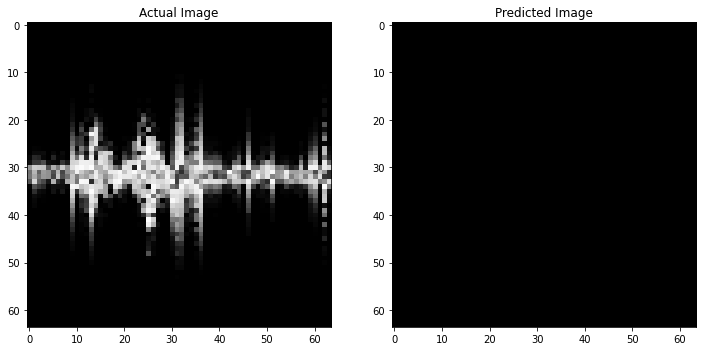

In [49]:
plt.figure(figsize=[12,12])

plt.subplot(1,2,1)
plt.imshow(x_test_1[10], cmap='gray')
plt.title("Actual Image")
  #curr_img = np.reshape(images_1[i], (64,64))
  #curr_lbl = labels_1[i]
  #plt.title("Label: " + str(curr_lbl))
plt.subplot(1,2,2)
plt.imshow(predictions1[10], cmap='gray')
plt.title("Predicted Image")

'''# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_data[10], (28,28))
curr_lbl = test_labels[10]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")'''


# After CAE Training

# Way-0

In [50]:
from keras.utils import to_categorical

In [51]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot1 = to_categorical(y_train_1)
val_Y_one_hot1 = to_categorical(y_val_1)
test_Y_one_hot1 = to_categorical(y_test_1)

# Display the change for category label using one-hot encoding
print('Original label:', y_train_1[0])
print('After conversion to one-hot:', train_Y_one_hot1[0])

# Change the labels from categorical to one-hot encoding
train_Y_one_hot2 = to_categorical(y_train_2)
val_Y_one_hot2 = to_categorical(y_val_2)
test_Y_one_hot2 = to_categorical(y_test_2)

# Display the change for category label using one-hot encoding
print('Original label:', y_train_2[0])
print('After conversion to one-hot:', train_Y_one_hot2[0])

# Change the labels from categorical to one-hot encoding
train_Y_one_hot3 = to_categorical(y_train_3)
val_Y_one_hot3 = to_categorical(y_val_3)
test_Y_one_hot3 = to_categorical(y_test_3)

# Display the change for category label using one-hot encoding
print('Original label:', y_train_3[0])
print('After conversion to one-hot:', train_Y_one_hot3[0])

Original label: 6.0
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Original label: 8.0
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Original label: 1.0
After conversion to one-hot: [0. 1.]


In [52]:
dict_labels_3={}
for i in range(len(labels_3)):
   dict_labels_3[i]=1
len(dict_labels_3)

94

In [53]:
y_test_3.shape,y_test_1.shape,y_test_2.shape

((19,), (130,), (147,))

In [ ]:
#x_train_1,x_val_1,y_train_1,y_val_1 = train_test_split(x_train_1,train_Y_one_hot,test_size=0.2,random_state=42)

In [54]:
y_train_1=train_Y_one_hot1
y_val_1=val_Y_one_hot1
y_test_1=test_Y_one_hot1

In [55]:
y_train_2=train_Y_one_hot2
y_val_2=val_Y_one_hot2
y_test_2=test_Y_one_hot2

In [56]:
y_train_3=train_Y_one_hot3
y_val_3=val_Y_one_hot3
y_test_3=test_Y_one_hot3

In [57]:
x_train_1.shape,x_val_1.shape,y_train_1.shape,y_val_1.shape

((414, 64, 64), (104, 64, 64), (414, 12), (104, 12))

In [58]:
encoded_image=encoder(input_img)
model=keras.Model(input_img,encoded_image)
x = layers.Flatten()(model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(12, activation='softmax')(x)
model1=tf.keras.models.Model(model.input,x)
model1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 16384)             0   

In [59]:
encoded_image=encoder(input_img)
model=keras.Model(input_img,encoded_image)
x = layers.Flatten()(model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(12, activation='softmax')(x)
model2=tf.keras.models.Model(model.input,x)
model2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 16384)             0   

In [60]:
encoded_image=encoder(input_img)
model=keras.Model(input_img,encoded_image)
x = layers.Flatten()(model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(12, activation='softmax')(x)
model3=tf.keras.models.Model(model.input,x)
model3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 16384)             0   

In [61]:
autoencoder.get_weights()[0][1]

NameError: ignored

In [62]:
model1.get_weights()[0][1]


array([[[ 6.72259182e-03,  2.76624709e-02, -2.68400609e-02,
          2.20396966e-02, -1.97670963e-02, -4.36612517e-02,
          3.70212644e-02,  3.20767239e-03,  1.96851790e-02,
          6.29909337e-03, -2.09897626e-02, -4.31333855e-03,
         -9.16419923e-03,  3.71478796e-02,  2.03346387e-02,
          3.30762938e-02,  4.07788754e-02, -8.46298039e-03,
         -3.14792991e-03,  1.42885968e-02, -3.23293917e-02,
         -1.56721100e-03,  3.41377780e-03, -1.56712160e-03,
         -4.52342331e-02, -3.49394977e-02, -4.39580046e-02,
          2.26651952e-02, -2.61330921e-02,  3.66446078e-02,
         -3.22342813e-02, -1.55320391e-03]],

       [[-3.60100791e-02, -3.69854905e-02,  1.55676827e-02,
         -2.16702428e-02,  4.69795763e-02, -3.27658840e-02,
         -4.69889343e-02, -2.80117504e-02, -3.54183950e-02,
          2.86219269e-02, -2.81670447e-02, -2.92790234e-02,
          1.16642825e-02,  2.73475498e-02, -1.26071870e-02,
         -2.25877017e-03,  3.41308862e-03, -3.09525393

In [63]:
for layer in model1.layers[0:7]:#6=no. of layers in encoder
    layer.trainable = False
for layer in model2.layers[0:7]:#6=no. of layers in encoder
    layer.trainable = False
for layer in model3.layers[0:7]:#6=no. of layers in encoder
    layer.trainable = False


In [64]:
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 16384)             0   

In [65]:
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 16384)             0   

In [66]:
model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 16384)             0   

In [91]:
model1.fit(x_train_1, y_train_1, batch_size=64,epochs=100,verbose=1,validation_data=(x_val_1, y_val_1))

Epoch 1/100
3/7 [===========>..................] - ETA: 0s - loss: 0.1074 - accuracy: 0.9948

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 [==============================] - 0s 59ms/step - loss: 0.1021 - accuracy: 0.9952 - val_loss: 0.6071 - val_accuracy: 0.7885
Epoch 2/100
7/7 [==============================] - 0s 51ms/step - loss: 0.0974 - accuracy: 0.9952 - val_loss: 0.6017 - val_accuracy: 0.8077
Epoch 3/100
7/7 [==============================] - 0s 45ms/step - loss: 0.0937 - accuracy: 0.9952 - val_loss: 0.6075 - val_accuracy: 0.8077
Epoch 4/100
7/7 [==============================] - 0s 45ms/step - loss: 0.0938 - accuracy: 0.9928 - val_loss: 0.6196 - val_accuracy: 0.8077
Epoch 5/100
7/7 [==============================] - 0s 50ms/step - loss: 0.0948 - accuracy: 0.9928 - val_loss: 0.6184 - val_accuracy: 0.7885
Epoch 6/100
7/7 [==============================] - 0s 48ms/step - loss: 0.0942 - accuracy: 0.9903 - val_loss: 0.6000 - val_accuracy: 0.7981
Epoch 7/100
7/7 [==============================] - 0s 51ms/step - loss: 0.0831 - accuracy: 0.9928 - val_loss: 0.6367 - val_accuracy: 0.7885
Epoch 8/100
7/7 [===============

In [92]:
model2.fit(x_train_2, y_train_2, batch_size=64,epochs=100,verbose=1,validation_data=(x_val_2, y_val_2))

Epoch 1/100
8/8 [==============================] - 0s 55ms/step - loss: 0.0962 - accuracy: 0.9936 - val_loss: 0.7381 - val_accuracy: 0.7458
Epoch 2/100
8/8 [==============================] - 0s 45ms/step - loss: 0.0970 - accuracy: 0.9936 - val_loss: 0.7541 - val_accuracy: 0.7458
Epoch 3/100
8/8 [==============================] - 0s 45ms/step - loss: 0.0917 - accuracy: 0.9936 - val_loss: 0.7489 - val_accuracy: 0.7203
Epoch 4/100
8/8 [==============================] - 0s 47ms/step - loss: 0.0921 - accuracy: 0.9957 - val_loss: 0.7611 - val_accuracy: 0.7288
Epoch 5/100
8/8 [==============================] - 0s 44ms/step - loss: 0.0909 - accuracy: 0.9936 - val_loss: 0.7436 - val_accuracy: 0.7542
Epoch 6/100
8/8 [==============================] - 0s 45ms/step - loss: 0.0846 - accuracy: 0.9979 - val_loss: 0.7287 - val_accuracy: 0.7542
Epoch 7/100
8/8 [==============================] - 0s 48ms/step - loss: 0.0857 - accuracy: 0.9936 - val_loss: 0.7928 - val_accuracy: 0.7203
Epoch 8/100
8/8 [===

In [93]:
#model3.fit(x_train_3, y_train_3, batch_size=64,epochs=100,verbose=1,validation_data=(x_val_3, y_val_3))

In [94]:
model1.save_weights('fully_trained_cae_model1.h5')
model2.save_weights('fully_trained_cae_model2.h5')
#model3.save_weights('fully_trained_cae_model3.h5')

In [95]:
model1.history.history['accuracy']

[0.9951691031455994,
 0.9951691031455994,
 0.9951691031455994,
 0.9927536249160767,
 0.9927536249160767,
 0.990338146686554,
 0.9927536249160767,
 0.9951691031455994,
 0.9951691031455994,
 0.9975845217704773,
 0.9975845217704773,
 0.9927536249160767,
 0.9975845217704773,
 0.9975845217704773,
 0.9927536249160767,
 0.9951691031455994,
 0.9951691031455994,
 0.9951691031455994,
 0.9975845217704773,
 0.9975845217704773,
 0.9975845217704773,
 0.9951691031455994,
 0.9975845217704773,
 0.9975845217704773,
 1.0,
 0.9975845217704773,
 0.9975845217704773,
 1.0,
 0.9975845217704773,
 1.0,
 0.9975845217704773,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,

# pending -training,validation accuracy & loss table

In [96]:
model1.history.history['loss']

[0.10206354409456253,
 0.09740911424160004,
 0.09369979798793793,
 0.09382947534322739,
 0.09483002871274948,
 0.09422048181295395,
 0.08313266187906265,
 0.08570465445518494,
 0.0813872292637825,
 0.07908263057470322,
 0.07761342823505402,
 0.08297835290431976,
 0.0768682137131691,
 0.07089249789714813,
 0.07014781981706619,
 0.07647602260112762,
 0.07389122247695923,
 0.0686989575624466,
 0.06468845903873444,
 0.06274030357599258,
 0.059893157333135605,
 0.05765103921294212,
 0.05279829353094101,
 0.0533047579228878,
 0.05239272862672806,
 0.0511435903608799,
 0.05148300528526306,
 0.04605617746710777,
 0.04891577735543251,
 0.046312954276800156,
 0.04905147850513458,
 0.04731697216629982,
 0.041677724570035934,
 0.04039661958813667,
 0.03954918682575226,
 0.03822718560695648,
 0.03629317879676819,
 0.035247787833213806,
 0.03483903408050537,
 0.03444470465183258,
 0.03357911482453346,
 0.03213723003864288,
 0.03200317174196243,
 0.03135829418897629,
 0.03062404878437519,
 0.03097069

In [101]:
model2.history.history['loss'][99],model2.history.history['accuracy'][99]*100,model2.history.history['val_loss'][99],model2.history.history['val_accuracy'][99]*100

(0.010327452793717384, 1.0, 0.8143719434738159, 0.8269230723381042)

In [104]:
col_names=['model1','model2']
#col_vals=[],[train_df_2.shape[0],test_df_2.shape[0]],[train_df_3.shape[0],test_df_3.shape[0]]]
d={'model1':[model1.history.history['loss'][99],model1.history.history['accuracy'][99]*100,model1.history.history['val_loss'][99],model1.history.history['val_accuracy'][99]*100],
   'model2':[model2.history.history['loss'][99],model2.history.history['accuracy'][99]*100,model2.history.history['val_loss'][99],model2.history.history['val_accuracy'][99]*100],
   #'model3':[test_eval3[0],test_eval3[1]]
}
final_result = pd.DataFrame(d)
final_result.index=['training_loss','training_accuracy','validation_loss','validation_accuracy']
print('Training & Validation accuracy, loss at 100th epoch')
final_result

Training & Validation accuracy, loss at 100th epoch


,model1,model2
training_loss,0.010327,0.009003
training_accuracy,100.000000,100.000000
validation_loss,0.814372,0.947712
validation_accuracy,82.692307,74.576271


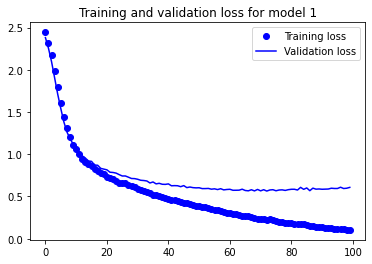

In [73]:
loss = model1.history.history['loss']
val_loss = model1.history.history['val_loss']
epochs = range(100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for model 1')
plt.legend()
plt.show()


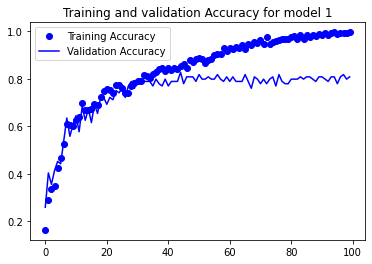

In [74]:
acc = model1.history.history['accuracy']
val_acc = model1.history.history['val_accuracy']
epochs = range(100)
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy for model 1')
plt.legend()
plt.show()


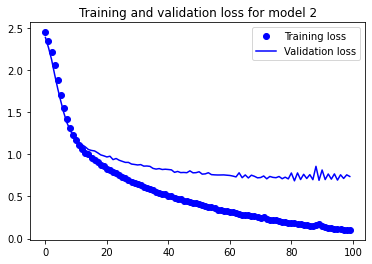

In [75]:
loss = model2.history.history['loss']
val_loss = model2.history.history['val_loss']
epochs = range(100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for model 2')
plt.legend()
plt.show()


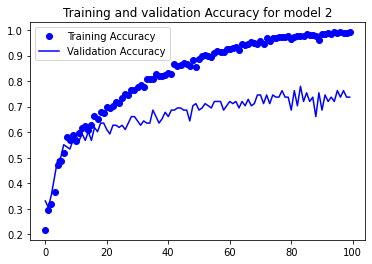

In [76]:
acc = model2.history.history['accuracy']
val_acc = model2.history.history['val_accuracy']
epochs = range(100)
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy for model 2')
plt.legend()
plt.show()


In [ ]:
'''loss = model3.history.history['loss']
val_loss = model3.history.history['val_loss']
epochs = range(100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
'''

In [105]:
val_eval1=model1.evaluate(x_val_1, y_val_1, verbose=0)
print('val loss:', val_eval1[0])
print('val accuracy:', val_eval1[1])

val loss: 0.814371645450592
val accuracy: 0.8269230723381042


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [106]:
val_eval2=model2.evaluate(x_val_2, y_val_2, verbose=0)
print('val loss:', val_eval2[0])
print('val accuracy:', val_eval2[1])


val loss: 0.9477121233940125
val accuracy: 0.7457627058029175


In [108]:
'''val_eval3=model3.evaluate(x_val_3, y_val_3, verbose=0)
print('Test loss:', val_eval3[0])
print('Test accuracy:', val_eval3[1])'''

"val_eval3=model3.evaluate(x_val_3, y_val_3, verbose=0)\nprint('Test loss:', val_eval3[0])\nprint('Test accuracy:', val_eval3[1])"

In [109]:
test_eval1 = model1.evaluate(x_test_1, y_test_1, verbose=0)
print('Test loss:', test_eval1[0])
print('Test accuracy:', test_eval1[1])

Test loss: 0.7084239721298218
Test accuracy: 0.7923076748847961


In [110]:
test_eval2 = model2.evaluate(x_test_2, y_test_2, verbose=0)
print('Test loss:', test_eval2[0])
print('Test accuracy:', test_eval2[1])


Test loss: 1.0233663320541382
Test accuracy: 0.7210884094238281


In [111]:
'''test_eval3 = model3.evaluate(x_test_3, y_test_3, verbose=0)
print('Test loss:', test_eval3[0])
print('Test accuracy:', test_eval3[1])'''

"test_eval3 = model3.evaluate(x_test_3, y_test_3, verbose=0)\nprint('Test loss:', test_eval3[0])\nprint('Test accuracy:', test_eval3[1])"

In [131]:
col_names=['model1','model2']
#col_vals=[],[train_df_2.shape[0],test_df_2.shape[0]],[train_df_3.shape[0],test_df_3.shape[0]]]
d={'model1':[test_eval1[0],test_eval1[1]*100],
   'model2':[test_eval2[0],test_eval2[1]*100],
   #'model3':[test_eval3[0],test_eval3[1]]
}
final_result = pd.DataFrame(d)
final_result.index=['testing_loss','testing_accuracy']
print('Testing accuracy and loss')
final_result

Testing accuracy and loss


,model1,model2
testing_loss,0.708424,1.023366
testing_accuracy,79.230767,72.108841


In [113]:
y_pred_1=model1.predict(x_test_1)
y_pred_2=model2.predict(x_test_2)

5/5 [==============================] - 0s 7ms/step


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [114]:
y_pred_1

array([[2.06979364e-10, 2.61842075e-14, 9.23158268e-07, ...,
        4.38667142e-13, 6.86986823e-09, 1.65919755e-13],
       [1.44733125e-09, 3.93318955e-16, 6.92521917e-06, ...,
        5.99367667e-10, 3.88542030e-05, 1.87211316e-10],
       [4.14754453e-09, 1.42686579e-14, 9.66078915e-06, ...,
        1.68860870e-10, 2.78596199e-05, 1.13268995e-11],
       ...,
       [1.20862508e-13, 1.52743616e-22, 5.43422320e-05, ...,
        4.00486508e-17, 1.89167974e-15, 1.41290281e-19],
       [3.89138693e-14, 2.24409671e-10, 1.22127270e-17, ...,
        2.49639284e-02, 2.00610293e-06, 9.74959254e-01],
       [1.32503619e-09, 7.56234827e-15, 1.28363026e-05, ...,
        3.36341684e-11, 1.67285043e-06, 1.87996424e-10]], dtype=float32)

In [115]:
y_pred_2

array([[3.8942913e-10, 1.4152822e-01, 2.0814839e-14, ..., 2.6859061e-03,
        5.2292929e-03, 1.9541408e-03],
       [3.8251811e-09, 4.7537553e-05, 2.6536435e-11, ..., 4.5656182e-02,
        1.1512722e-02, 7.6584411e-01],
       [2.9658827e-09, 1.3492891e-01, 8.3024890e-13, ..., 3.7699894e-03,
        3.5784394e-01, 3.1417015e-01],
       ...,
       [6.2171331e-12, 3.0202109e-05, 5.2966892e-16, ..., 9.9983847e-01,
        1.7766590e-05, 4.8613310e-05],
       [5.6000440e-11, 9.9160296e-01, 3.4793422e-15, ..., 9.3969284e-06,
        3.9361166e-05, 3.1589830e-06],
       [8.2334669e-12, 9.9778974e-01, 4.4814295e-16, ..., 1.1938288e-08,
        4.0454842e-07, 3.9224349e-07]], dtype=float32)

In [116]:
y_pred_1 = np.argmax(np.round(y_pred_1),axis=1)
y_pred_1

array([ 3,  4,  0,  5,  7,  5,  4,  1,  4,  9,  4, 11, 11,  1,  5,  9,  6,
        6,  7,  8, 10,  7, 10,  8,  1, 10,  9, 10,  1,  8,  3,  8,  9,  1,
        2,  4,  7,  6,  4,  9,  9,  0,  1,  7,  3,  8,  6, 11, 11,  5,  3,
        7,  1,  1,  8, 10,  9,  5,  8, 11,  7,  5,  7,  6,  6, 10, 10,  2,
        9,  0,  7,  6,  8,  1,  3,  8,  6, 10, 11,  4,  6,  0,  3,  2, 11,
       10,  7, 10, 11,  6,  7,  9,  8, 10,  5,  1,  3,  4,  0,  9,  1,  7,
        1,  7,  1, 10,  2,  9,  1,  9,  7,  2,  6,  2,  1, 10,  1,  7,  4,
        2, 11,  3,  4,  1,  6,  1,  6,  5, 11,  4])

In [117]:
y_pred_2 = np.argmax(np.round(y_pred_2),axis=1)
y_pred_2

array([ 8, 11,  0,  9,  9, 11,  8,  4,  2,  8,  3,  2,  4,  4,  8,  7, 10,
       11,  1,  3,  4, 11,  4,  1,  8,  2,  7, 10,  0,  3,  0,  6,  8,  9,
        6,  5,  4, 10, 11,  8,  7, 10,  5,  2,  8,  4, 11, 11,  5,  9,  2,
       10,  8, 11,  6,  3,  4,  4,  2, 10,  2,  2,  7, 10,  1,  4,  2,  6,
        1,  2,  7,  8,  8,  7,  1, 11,  4,  1,  4,  4,  3,  7,  9,  4, 11,
        2, 11,  8,  5,  9, 11,  4,  3, 10,  3,  6,  1, 10,  4,  2,  2, 11,
        0,  8,  7,  3,  9,  3, 11,  1,  9,  2,  2, 10,  4,  9,  8,  5, 11,
       11,  7,  9, 10,  7,  8,  4,  7, 11,  4,  8,  3,  2,  3, 10,  2, 10,
       11, 11,  3,  7,  5,  7,  8,  8,  9,  1,  1])

In [118]:
y_pred_1.shape,y_test_1.shape

((130,), (130, 12))

In [119]:
y_pred_2.shape,y_test_2.shape

((147,), (147, 12))

In [126]:
y_test_1

array([ 3.,  4.,  3.,  5.,  7.,  5.,  4.,  9.,  4., 11.,  3., 11., 11.,
        7.,  5., 11.,  6.,  3.,  7.,  8., 10.,  7., 10.,  8.,  1., 10.,
        9., 10.,  1.,  8.,  3.,  8.,  9.,  1.,  2.,  4.,  7.,  6.,  4.,
        9.,  9.,  6.,  1.,  7.,  3.,  8.,  3., 11., 11.,  5.,  3.,  7.,
        1.,  1.,  8., 10.,  9.,  5.,  8., 11.,  7.,  5.,  7.,  6.,  6.,
       10., 10.,  2.,  9.,  1.,  7.,  6.,  8.,  1.,  4.,  8.,  4., 10.,
        8.,  3.,  6.,  3.,  5.,  2., 10., 10.,  7., 11., 11.,  3.,  7.,
        9.,  8., 10.,  5.,  8.,  3.,  3., 11.,  9.,  1.,  7.,  8.,  7.,
        9., 10.,  2.,  7.,  1.,  9.,  7.,  2.,  7.,  2.,  1., 10.,  9.,
        7.,  4.,  2., 10.,  3.,  3.,  9.,  4.,  1.,  6.,  5., 11.,  3.],
      dtype=float32)

In [127]:
y_test_2

array([ 1.,  8., 11.,  9.,  9.,  9.,  8.,  4.,  2.,  9.,  4.,  2.,  4.,
        3.,  8.,  7.,  8., 11.,  1.,  4.,  4., 11.,  6.,  8.,  8.,  2.,
        7., 10., 11.,  3.,  9.,  6.,  1.,  9.,  6.,  5.,  4., 10., 11.,
        8.,  7., 10.,  5.,  2.,  1.,  4.,  1., 11.,  5., 11.,  2., 10.,
       10., 11.,  4.,  3.,  4.,  4.,  2., 11.,  2.,  2.,  7., 10.,  1.,
        4.,  2.,  6.,  8.,  2.,  7.,  8., 11.,  7.,  1.,  7.,  4.,  1.,
        8.,  4.,  3.,  7., 11.,  4., 11.,  2., 11., 10.,  5.,  9.,  8.,
        2.,  3., 10.,  3.,  6.,  1., 10.,  4.,  2.,  2., 11., 10.,  7.,
        7.,  3., 11.,  3.,  9.,  8., 10.,  2.,  2., 10.,  6., 11.,  8.,
        5., 11., 10.,  7.,  9., 10.,  7.,  8.,  6.,  7., 11.,  3.,  8.,
        3.,  2.,  3., 10.,  2., 11.,  7., 11.,  3.,  8.,  5.,  7.,  8.,
        8.,  9.,  1.,  1.], dtype=float32)

In [122]:
classes=[]
classes.append('NA')
l=list(m.keys())
classes=classes+l
classes

['NA',
 '05_Walking_towards_radar',
 '06_walking_away_from_Radar',
 '07_picking_up_an_object',
 '08_bending',
 '09_sitting',
 '10_kneeling',
 '11_crawling',
 '16_Walking_on_both_toes',
 '17_limping_with_right_leg_stiff',
 '18_short_steps',
 '19_scissors_gait']

# Classification report

In [132]:
from sklearn.metrics import classification_report
#class_labels = list(x_test_1.class_indices.keys())
#target_names = ["Class {}".format(i) for i in range(12)]
print('Classification_report when Test_images_1 is tested on model-1')
print(classification_report(y_test_1, y_pred_1,target_names=classes))

Classification_report when Test_images_1 is tested on model-1
                                 precision    recall  f1-score   support

                             NA       0.00      0.00      0.00         0
       05_Walking_towards_radar       0.61      0.92      0.73        12
     06_walking_away_from_Radar       1.00      1.00      1.00         7
        07_picking_up_an_object       0.75      0.38      0.50        16
                     08_bending       0.55      0.67      0.60         9
                     09_sitting       1.00      0.89      0.94         9
                    10_kneeling       0.54      0.88      0.67         8
                    11_crawling       1.00      0.83      0.91        18
        16_Walking_on_both_toes       1.00      0.77      0.87        13
17_limping_with_right_leg_stiff       0.75      0.69      0.72        13
                 18_short_steps       0.92      0.86      0.89        14
               19_scissors_gait       0.70      0.64      0.6

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
print('Classification_report when Test_images_2 is tested on model-2')
print(classification_report(y_test_2, y_pred_2,target_names=classes))

Classification_report when Test_images_2 is tested on model-2
                                 precision    recall  f1-score   support

                             NA       0.00      0.00      0.00         0
       05_Walking_towards_radar       0.70      0.64      0.67        11
     06_walking_away_from_Radar       1.00      0.94      0.97        18
        07_picking_up_an_object       0.83      0.83      0.83        12
                     08_bending       0.63      0.80      0.71        15
                     09_sitting       1.00      1.00      1.00         6
                    10_kneeling       0.80      0.57      0.67         7
                    11_crawling       0.92      0.80      0.86        15
        16_Walking_on_both_toes       0.56      0.56      0.56        18
17_limping_with_right_leg_stiff       0.55      0.60      0.57        10
                 18_short_steps       0.77      0.67      0.71        15
               19_scissors_gait       0.58      0.55      0.5

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
m.keys(),m.values()

(dict_keys(['05_Walking_towards_radar', '06_walking_away_from_Radar', '07_picking_up_an_object', '08_bending', '09_sitting', '10_kneeling', '11_crawling', '16_Walking_on_both_toes', '17_limping_with_right_leg_stiff', '18_short_steps', '19_scissors_gait']),
 dict_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]))

In [118]:
l=list(m.values())
l

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Confusion Matrix

Text(0.5, 1.0, 'Heatmap when testing_images_1 is tested on model-1')

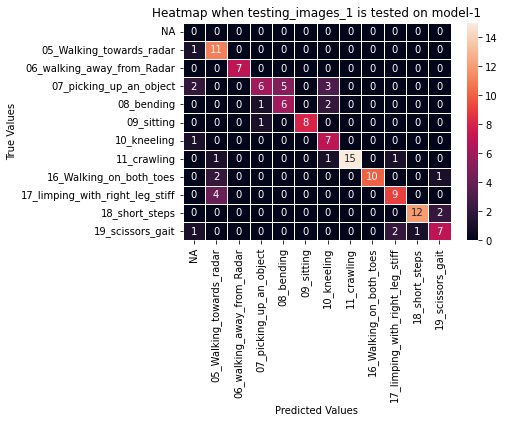

In [134]:
res = confusion_matrix(y_test_1,y_pred_1)
#sns.heatmap(res,annot=True,linewidth=0.5,xticklabels=classes,yticklabels=classes).set(xlabel="Predicted Values", ylabel="True Values")
sns.heatmap(res,annot=True,linewidth=0.5,xticklabels=classes,yticklabels=classes).set(xlabel="Predicted Values", ylabel="True Values")
plt.title("Heatmap when testing_images_1 is tested on model-1")

Text(0.5, 1.0, 'Heatmap when testing_images_2 is tested on model-2')

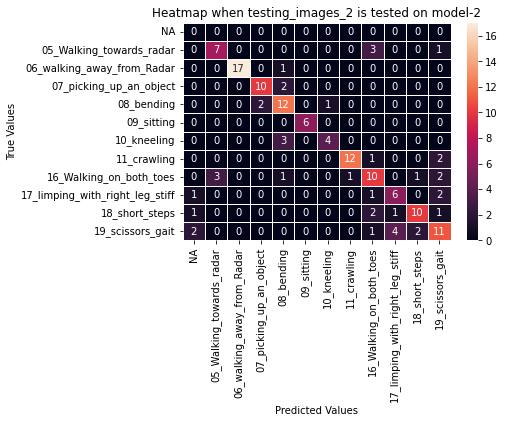

In [135]:
res = confusion_matrix(y_test_2,y_pred_2)
#sns.heatmap(res,annot=True,linewidth=0.5,xticklabels=classes,yticklabels=classes).set(xlabel="Predicted Values", ylabel="True Values")
sns.heatmap(res,annot=True,linewidth=0.5,xticklabels=classes,yticklabels=classes).set(xlabel="Predicted Values", ylabel="True Values")
plt.title("Heatmap when testing_images_2 is tested on model-2")

In [ ]:
col_names=['model1','model2','model3']
#col_vals=[],[train_df_2.shape[0],test_df_2.shape[0]],[train_df_3.shape[0],test_df_3.shape[0]]]
d={'model1':[test_eval1[0],test_eval1[1]],
   'model2':[test_eval2[0],test_eval2[1]],
   'model3':[test_eval3[0],test_eval3[1]]
}
final_result = pd.DataFrame(d)
final_result.index=['testing_loss','testing_accuracy']
final_result

# Way-1

In [ ]:
encoded_image=encoder(input_img)
model=keras.Model(input_img,encoded_image)
x = layers.Flatten()(model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(11, activation='softmax')(x)
model1=tf.keras.models.Model(model.input,x)
model1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 16384)             0   

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'categorical_crossentropy',metrics = ['accuracy'])
#model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['acc'])
#model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])

In [ ]:
x_train_1.shape,y_train_1.shape

((414, 64, 64, 1), (414,))

In [ ]:
model1.fit(x_train_1,y_train_1, validation_data = (x_val_1,y_val_1), epochs = 100)

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13/13 [==============================] - 10s 692ms/step - loss: 0.0000e+00 - accuracy: 0.0942 - val_loss: 0.0000e+00 - val_accuracy: 0.0769
Epoch 2/100
13/13 [==============================] - 13s 999ms/step - loss: 0.0000e+00 - accuracy: 0.0942 - val_loss: 0.0000e+00 - val_accuracy: 0.0769
Epoch 3/100
13/13 [==============================] - 10s 815ms/step - loss: 0.0000e+00 - accuracy: 0.0942 - val_loss: 0.0000e+00 - val_accuracy: 0.0769
Epoch 4/100
 9/13 [===================>..........] - ETA: 2s - loss: 0.0000e+00 - accuracy: 0.0972

KeyboardInterrupt: ignored

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model1.evaluate(x_test_1, y_test_1)
print("test loss, test acc:", results)

Evaluate on test data


ValueError: ignored

# Way-2 Datacamp

# Rough-2

In [ ]:
'''
encoder = keras.Model(input_img, encoded)
x = layers.Flatten()(encoder.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(11, activation='softmax')(x)
model1=tf.keras.models.Model(encoder.input,x)
model1.summary()
#encoded_imgs=encoder.predict()
'''

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'categorical_crossentropy',metrics = ['acc'])
#model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['acc'])
#model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])

In [ ]:
model1.fit(x_train_1,y_train_1, validation_data = (x_val_1,y_val_1), epochs = 100)
'''
autoencoder.fit(train_images_1,
          epochs=100, 
          batch_size=16,
          validation_data=val_images_1)
'''

Epoch 1/100


ValueError: ignored

In [ ]:
print(max(labels_1),min(labels_1))
print(max(y_train_1),min(y_train_1))

11 1
11 1


# End